In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from timm import create_model
from tqdm import tqdm

In [2]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 20
num_classes = 2 

In [3]:
import os
import random
from sklearn.model_selection import train_test_split
# Set random seed
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

In [4]:
#dataset_path
dataset_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset"
train_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/train"
val_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/val"


In [5]:
# Load dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size expected by the model
    transforms.ToTensor(),          # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize using ImageNet stats
])

train_data = datasets.ImageFolder(root=train_path, transform=transform)
val_data = datasets.ImageFolder(root=val_path, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
import matplotlib.pyplot as plt
from tqdm import tqdm  # for showing progress bars

# Load a pretrained TNT model
model = timm.create_model("tnt_s_patch16_224", pretrained=True)

# Replace the final classification head
model.head = nn.Sequential(
    nn.Dropout(p=0.3),  # regularization to reduce overfitting
    nn.Linear(model.head.in_features, num_classes)  # final layer for classification
)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # standard for classification tasks
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

# Lists to store loss and accuracy over epochs
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Loop over epochs
for epoch in range(num_epochs):
    model.train()  # set model to training mode
    running_loss, correct_preds, total_preds = 0.0, 0, 0

    # Loop over training batches
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # reset gradients

        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # compute loss
        loss.backward()  # backpropagation
        optimizer.step()  # update weights

        # Track metrics
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)  # get class predictions
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct_preds / total_preds
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    # Validation phase
    model.eval()  # switch to evaluation mode
    val_loss, correct_preds, total_preds = 0.0, 0, 0
    with torch.no_grad():  # no gradient calculation needed
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_acc = correct_preds / total_preds
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Validation Acc: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:43<00:00,  1.68it/s]


Epoch 1/20, Train Loss: 0.7095, Train Acc: 0.5662
Validation Acc: 0.6089, Validation Loss: 0.6572


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:42<00:00,  1.70it/s]


Epoch 2/20, Train Loss: 0.5978, Train Acc: 0.6757
Validation Acc: 0.5964, Validation Loss: 0.6945


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:37<00:00,  1.75it/s]


Epoch 3/20, Train Loss: 0.5067, Train Acc: 0.7559
Validation Acc: 0.7741, Validation Loss: 0.4945


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:53<00:00,  1.59it/s]


Epoch 4/20, Train Loss: 0.4125, Train Acc: 0.8137
Validation Acc: 0.7643, Validation Loss: 0.4876


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:52<00:00,  1.60it/s]


Epoch 5/20, Train Loss: 0.3487, Train Acc: 0.8519
Validation Acc: 0.7848, Validation Loss: 0.4536


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:51<00:00,  1.60it/s]


Epoch 6/20, Train Loss: 0.2977, Train Acc: 0.8770
Validation Acc: 0.8313, Validation Loss: 0.3772


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:51<00:00,  1.61it/s]


Epoch 7/20, Train Loss: 0.2717, Train Acc: 0.8901
Validation Acc: 0.8036, Validation Loss: 0.4493


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:49<00:00,  1.62it/s]


Epoch 8/20, Train Loss: 0.2262, Train Acc: 0.9105
Validation Acc: 0.8089, Validation Loss: 0.4472


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:52<00:00,  1.60it/s]


Epoch 9/20, Train Loss: 0.2020, Train Acc: 0.9199
Validation Acc: 0.8187, Validation Loss: 0.4529


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:53<00:00,  1.58it/s]


Epoch 10/20, Train Loss: 0.1731, Train Acc: 0.9332
Validation Acc: 0.8304, Validation Loss: 0.4849


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:48<00:00,  1.63it/s]


Epoch 11/20, Train Loss: 0.1577, Train Acc: 0.9381
Validation Acc: 0.8045, Validation Loss: 0.4609


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:52<00:00,  1.59it/s]


Epoch 12/20, Train Loss: 0.1405, Train Acc: 0.9438
Validation Acc: 0.8125, Validation Loss: 0.5563


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:52<00:00,  1.59it/s]


Epoch 13/20, Train Loss: 0.1333, Train Acc: 0.9512
Validation Acc: 0.8152, Validation Loss: 0.5245


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:51<00:00,  1.60it/s]


Epoch 14/20, Train Loss: 0.1032, Train Acc: 0.9612
Validation Acc: 0.8466, Validation Loss: 0.7170


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:51<00:00,  1.60it/s]


Epoch 15/20, Train Loss: 0.1143, Train Acc: 0.9555
Validation Acc: 0.8573, Validation Loss: 0.4752


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:45<00:00,  1.66it/s]


Epoch 16/20, Train Loss: 0.1041, Train Acc: 0.9592
Validation Acc: 0.8259, Validation Loss: 0.4864


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:50<00:00,  1.61it/s]


Epoch 17/20, Train Loss: 0.0836, Train Acc: 0.9681
Validation Acc: 0.8759, Validation Loss: 0.6665


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:52<00:00,  1.60it/s]


Epoch 18/20, Train Loss: 0.0778, Train Acc: 0.9705
Validation Acc: 0.8841, Validation Loss: 0.6380


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:49<00:00,  1.63it/s]


Epoch 19/20, Train Loss: 0.0786, Train Acc: 0.9913
Validation Acc: 0.8864, Validation Loss: 0.6382


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [02:51<00:00,  1.60it/s]


Epoch 20/20, Train Loss: 0.0755, Train Acc: 0.9913
Validation Acc: 0.9087, Validation Loss: 0.6715


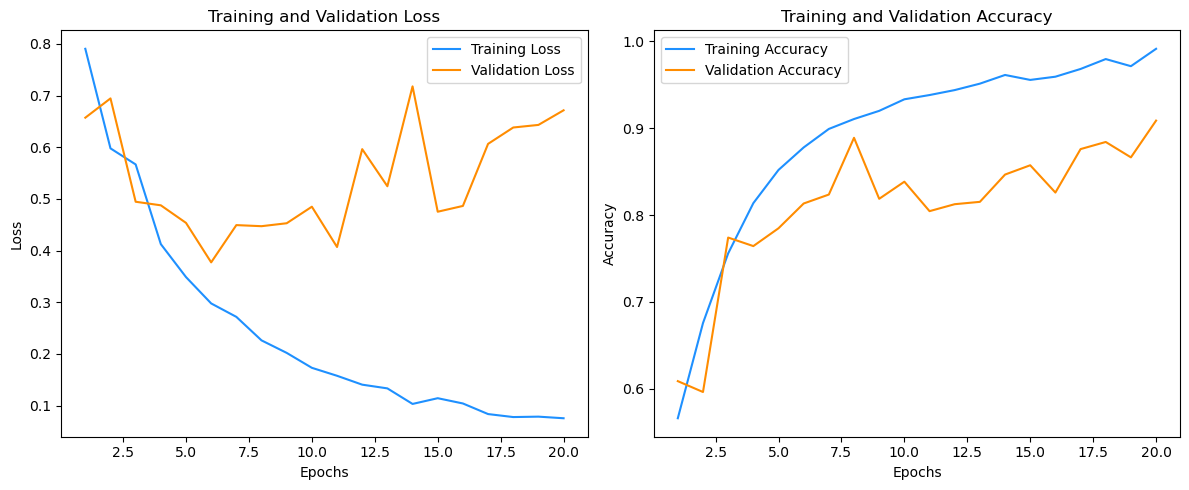

In [7]:
# Plot results
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [9]:
test_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/test"
# Load the test dataset
test_data = datasets.ImageFolder(root=test_path, transform=transform)

# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

model.eval()

# Initialize tracking variables
test_loss = 0.0
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Get predictions
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

# Compute final loss and accuracy
test_loss /= len(test_loader)
test_accuracy = correct_preds / total_preds

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Test Accuracy: 0.8725, Test Loss: 0.6050


In [10]:
#classification report

from sklearn.metrics import classification_report

all_preds = []
all_labels = []

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Calculate and print the classification report
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        620
           1       0.85      0.82      0.85        510

    accuracy                           0.87       1130
   macro avg       0.87      0.87      0.87       1130
weighted avg       0.87      0.87      0.87       1130

